Determine a function f such that the value of the pension savings in 30 years can be expressed as $V_{30} = f(μ,σ,p,c,Z_1,...,Z_{30})$. Then 
1. simulate a sample of suitable size n from the distribution of $(Z_1, . . . , Z_{30})$ and,
2. use this sample to determine the empirical distribution $F_n$ of $V_{30}$ for a range of values of the parameters μ, σ, p, c.

Add section to import function HW2.ipynb to here instead,  unfortunely to do this we need to run the inital code which is not optimal


In [3]:
# Step 1.0: Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Step 1.1: Create the portfolio function
def sample_V(R1, years, sample_size, p, c, yearly_investment=1000):
    frac = lambda k: p*(1-c*(k-1)/30)
    q = np.array([frac(i+1) for i in range(30)])
    phi = q*(R1 - R0) + R0
    return pd.DataFrame(yearly_investment*phi.sort_index(axis=1,ascending=False).cumprod(axis=1).sum(axis=1))


In [15]:
# Step 1.2: Initiate the constants to find a suitable size n
r = 0.01; R0 = np.exp(r); # Bank Account, i.e., risk free asset (zero coupon bond)
n = 2000
sample_sizes = np.array([i for i in range(n)]) # Sequence 1:10000
years = 30
my, sigma = 0.03, 0.2
p, c = 1e-5, 5e-1


In [16]:
# Step 1.3: Calculate the mean value such it is stable

def mean(x):
    return sum(x)/len(x)

store_mean = np.zeros(n) # Store the mean value of V30 for n = 1:10000
for i in range(0,n):
    Z = pd.DataFrame(np.random.standard_normal(size=(i+1,years))) # i + 1 because python starts at 0
    R1 = np.exp(my + sigma*Z)
    V30 = sample_V(R1, years, i+1, p, c, yearly_investment=1000)
    store_mean[i] = mean(np.array(V30))


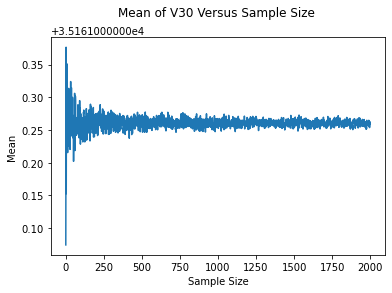

In [23]:
# Step 1.4: Plot the result

fig=plt.figure()
plt.plot(sample_sizes, store_mean)
plt.title('Mean of V30 Versus Sample Size \n')
plt.xlabel('Sample Size')
plt.ylabel('Mean')
plt.show()
fig.savefig('./Figures/a/mean_convergence.jpg')
plt.show()


In [72]:
# Step 2.1: Create the empirical distribution function
plt.rcParams['axes.formatter.useoffset'] = False



def emp_dist(x, samples):
    ind = samples < x
    return (ind.sum()/samples.shape[0])[0]
def plot_emp_dist(samples, sample_lenght=10):
    samples = samples.sort_values(by=0)
    h = sample_lenght*samples.shape[0]
    interval = samples.iloc[-1][0] - samples.iloc[0][0]
    delta = interval/h
    
    x = [samples.iloc[0][0] + i*delta for i in range(h)]
    y = [emp_dist(i, samples) for i in x]

    return x,y

In [73]:
# Step 2.2: Initiate the constants to for multiple plots
r = 0.01; R0 = np.exp(r); # Bank Account, i.e., risk free asset (zero coupon bond)
sample_size = 2000
years = 30
my = [0.1, 0.1, 0.5, 0.1, 0.1, 0.1] 
sigma = [0.03, 0.15, 0.03, 0.03, 0.03, 0.03]
p = [1e-5, 1e-5, 1e-5, 0.02, 1e-5, 1]
c = [5e-1, 5e-1, 5e-1, 5e-1, 1, 5e-1]
Z = pd.DataFrame(np.random.standard_normal(size=(sample_size,years)))


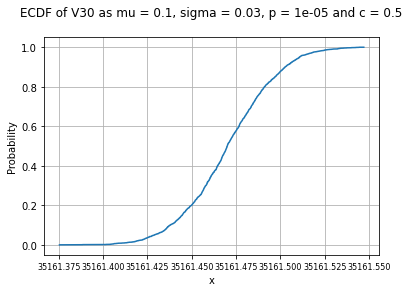

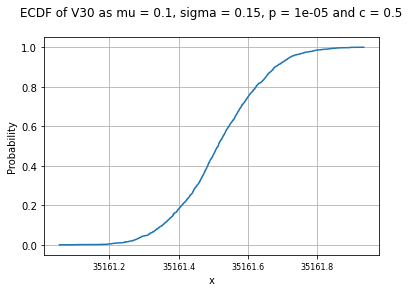

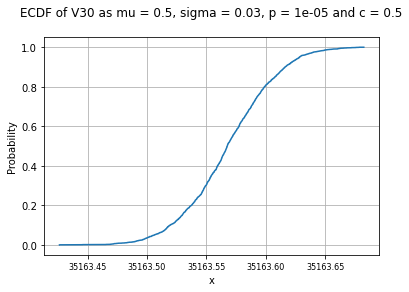

In [ ]:
# Step 2.3: Calculate V30 for my, sigma, p and c
for i in range(0,len(p)): # i = 0 & 1
    R1 = np.exp(my[i] + sigma[i]*Z)
    V30 = sample_V(R1, years, sample_size, p[i], c[i], yearly_investment=1000)
    x,y = plot_emp_dist(V30)
    fig=plt.figure()
    plt.plot(x, y)
    plt.xticks(fontsize=8)
    plt.title('ECDF of V30 as mu = ' + str(my[i]) + ', sigma = ' + str(sigma[i])
    + ', p = ' + str(p[i]) + ' and c = ' + str(c[i]) + '\n')
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.grid()
    fig.savefig('./Figures/a/ecdf' + str(i) + '.jpg')
    plt.show()





Text(0, 0.5, 'alpha')

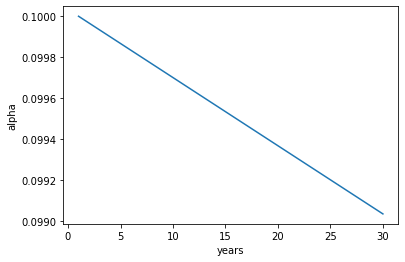

In [43]:
def alpha_func(p,c, year = 30):
    store = np.zeros(year)
    for k in range(0,year):
        store[k] = p*(1-c*(k+1-1)/30)
    return store


plt.plot(np.arange(1,31), alpha_func(0.1,0.01, 30)) # np.arange(1,31) = 1:30
plt.xlabel('years')
plt.ylabel('alpha')


In [18]:
np.arange(1,31)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])